# **Preprocessing**

In preprocessing the data, the following steps are taken:

> * Prepare packages and setup  
> * Load in the data  
> * Tidy the data and store metadata  
> * Inspect data with various metrics  
> * Inspect data with visualisations 
> * Select locations
> * Select timeframe
> * Feature engineering
> * Perform train-validation-test-split  
> * Normalisation  
> * Create big combined normalised dataframe

#### **Prepare packages and setup**

In [1]:
from pipeline import read_meteo_csv_from_data_raw
from pipeline import read_four_contaminants
from pipeline import get_metadata
from pipeline import tidy_raw_contaminant_data
from pipeline import tidy_raw_meteo_data
from pipeline import print_sensor_metrics_min_mean_max_entries
from pipeline import subset_sensors
from pipeline import perform_data_split
from pipeline import perform_data_split_without_train
from pipeline import print_split_ratios


Running __init__.py for data pipeline
Pipeline initialized



In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (6, 2) # landscape plots

"Global" variables (we're still in a notebook)

In [3]:
DEVICE = 'tinus'                        # for working directory compatibility

# =============================================================================

SUBSET_MONTHS = bool(1)                 # If true, only the months specified in the list below will be
                                        # used for the training, validation and testing set
START_MON = '08'                        # starting month for the data
END_MON = '12'                          # ending month for the data

# ============================================================================+

# Sensor locations in the case of Utrecht area:
DE_BILT = 'S260'                        # starting (and only used) location for meteorological data
TUINDORP = 'NL10636'                    # starting location for contamination data
BREUKELEN = 'NL10641'                   # 'goal' location for contamination data

# =============================================================================

# At multiple locations, a sys.exit() can be used to halt the script

#### **Load in the data**

In [4]:
path = r"c:\Users\vwold\Documents\Bachelor\thesis\bsc_thesis\preprocessing"
device = 'tinus'

contaminants = ['PM25', 'PM10', 'O3', 'NO2']

df_PM25_2016_raw, df_PM10_2016_raw, df_O3_2016_raw, df_NO2_2016_raw = \
    read_four_contaminants(2016, contaminants, path, device)
df_PM25_2017_raw, df_PM10_2017_raw, df_O3_2017_raw, df_NO2_2017_raw = \
    read_four_contaminants(2017, contaminants, path, device)
df_PM25_2018_raw, df_PM10_2018_raw, df_O3_2018_raw, df_NO2_2018_raw = \
    read_four_contaminants(2018, contaminants, path, device)
df_PM25_2019_raw, df_PM10_2019_raw, df_O3_2019_raw, df_NO2_2019_raw = \
    read_four_contaminants(2019, contaminants, path, device)
df_PM25_2020_raw, df_PM10_2020_raw, df_O3_2020_raw, df_NO2_2020_raw = \
    read_four_contaminants(2020, contaminants, path, device)
df_PM25_2021_raw, df_PM10_2021_raw, df_O3_2021_raw, df_NO2_2021_raw = \
    read_four_contaminants(2021, contaminants, path, device)
df_PM25_2022_raw, df_PM10_2022_raw, df_O3_2022_raw, df_NO2_2022_raw = \
    read_four_contaminants(2022, contaminants, path, device)
df_PM25_2023_raw, df_PM10_2023_raw, df_O3_2023_raw, df_NO2_2023_raw = \
    read_four_contaminants(2023, contaminants, path, device)

In [5]:
df_meteo_2016_raw = read_meteo_csv_from_data_raw(2016, path, device)
df_meteo_2017_raw = read_meteo_csv_from_data_raw(2017, path, device)
df_meteo_2018_raw = read_meteo_csv_from_data_raw(2018, path, device)
df_meteo_2019_raw = read_meteo_csv_from_data_raw(2019, path, device)
df_meteo_2020_raw = read_meteo_csv_from_data_raw(2020, path, device)
df_meteo_2021_raw = read_meteo_csv_from_data_raw(2021, path, device)
df_meteo_2022_raw = read_meteo_csv_from_data_raw(2022, path, device)
df_meteo_2023_raw = read_meteo_csv_from_data_raw(2023, path, device)

In [6]:
# print(df_meteo_2016_raw.head(1))
# print(df_meteo_2017_raw.head(1))
# print(df_meteo_2018_raw.head(1))
# print(df_meteo_2019_raw.head(1))
# print(df_meteo_2020_raw.head(1))
# print(df_meteo_2021_raw.head(1))
print(df_meteo_2022_raw.head(1))
print(df_meteo_2023_raw.head(1))

   # STN  YYYYMMDD     HH     DD     FH     FF     FX      T   T10N     TD  \
0    260  20220102      1    200     50     50     80    113           101   

   ...     VV      N      U     WW     IX      M      R      S     O      Y  
0  ...     65      8     91     61      7      0      1      0     0      0  

[1 rows x 25 columns]
   # STN  YYYYMMDD     HH     DD     FH     FF     FX      T   T10N     TD  \
0    260  20230102      1    180     40     30     70    114           101   

   ...     VV      N      U     WW     IX      M      R      S     O      Y  
0  ...     65      8     91             5      0      0      0     0      0  

[1 rows x 25 columns]


#### **Tidy the data and store metadata**

First, tidy the contaminant data

In [7]:
PM25_2016_meta = get_metadata(df_PM25_2016_raw)
PM10_2016_meta = get_metadata(df_PM10_2016_raw)
O3_2016_meta   = get_metadata(df_O3_2016_raw)
NO2_2016_meta  = get_metadata(df_NO2_2016_raw)
PM25_2017_meta = get_metadata(df_PM25_2017_raw)
PM10_2017_meta = get_metadata(df_PM10_2017_raw)
O3_2017_meta   = get_metadata(df_O3_2017_raw)
NO2_2017_meta  = get_metadata(df_NO2_2017_raw)
PM25_2018_meta = get_metadata(df_PM25_2018_raw)
PM10_2018_meta = get_metadata(df_PM10_2018_raw)
O3_2018_meta   = get_metadata(df_O3_2018_raw)
NO2_2018_meta  = get_metadata(df_NO2_2018_raw)
PM25_2019_meta = get_metadata(df_PM25_2019_raw)
PM10_2019_meta = get_metadata(df_PM10_2019_raw)
O3_2019_meta   = get_metadata(df_O3_2019_raw)
NO2_2019_meta  = get_metadata(df_NO2_2019_raw)
PM25_2020_meta = get_metadata(df_PM25_2020_raw)
PM10_2020_meta = get_metadata(df_PM10_2020_raw)
O3_2020_meta   = get_metadata(df_O3_2020_raw)
NO2_2020_meta  = get_metadata(df_NO2_2020_raw)
PM25_2021_meta = get_metadata(df_PM25_2021_raw)
PM10_2021_meta = get_metadata(df_PM10_2021_raw)
O3_2021_meta   = get_metadata(df_O3_2021_raw)
NO2_2021_meta  = get_metadata(df_NO2_2021_raw)
PM25_2022_meta = get_metadata(df_PM25_2022_raw)
PM10_2022_meta = get_metadata(df_PM10_2022_raw)
O3_2022_meta   = get_metadata(df_O3_2022_raw)
NO2_2022_meta  = get_metadata(df_NO2_2022_raw)
PM25_2023_meta = get_metadata(df_PM25_2023_raw)
PM10_2023_meta = get_metadata(df_PM10_2023_raw)
O3_2023_meta   = get_metadata(df_O3_2023_raw)
NO2_2023_meta  = get_metadata(df_NO2_2023_raw)

df_PM25_2016_tidy = tidy_raw_contaminant_data(df_PM25_2016_raw, '2016', SUBSET_MONTHS, START_MON, END_MON)
df_PM10_2016_tidy = tidy_raw_contaminant_data(df_PM10_2016_raw, '2016', SUBSET_MONTHS, START_MON, END_MON)
df_O3_2016_tidy   = tidy_raw_contaminant_data(df_O3_2016_raw, '2016', SUBSET_MONTHS, START_MON, END_MON)
df_NO2_2016_tidy  = tidy_raw_contaminant_data(df_NO2_2016_raw, '2016', SUBSET_MONTHS, START_MON, END_MON)
df_PM25_2017_tidy = tidy_raw_contaminant_data(df_PM25_2017_raw, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_PM10_2017_tidy = tidy_raw_contaminant_data(df_PM10_2017_raw, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_O3_2017_tidy   = tidy_raw_contaminant_data(df_O3_2017_raw, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_NO2_2017_tidy  = tidy_raw_contaminant_data(df_NO2_2017_raw, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_PM25_2018_tidy = tidy_raw_contaminant_data(df_PM25_2018_raw, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_PM10_2018_tidy = tidy_raw_contaminant_data(df_PM10_2018_raw, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_O3_2018_tidy   = tidy_raw_contaminant_data(df_O3_2018_raw, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_NO2_2018_tidy  = tidy_raw_contaminant_data(df_NO2_2018_raw, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_PM25_2019_tidy = tidy_raw_contaminant_data(df_PM25_2019_raw, '2019', SUBSET_MONTHS, START_MON, END_MON)
df_PM10_2019_tidy = tidy_raw_contaminant_data(df_PM10_2019_raw, '2019', SUBSET_MONTHS, START_MON, END_MON)
df_O3_2019_tidy   = tidy_raw_contaminant_data(df_O3_2019_raw, '2019', SUBSET_MONTHS, START_MON, END_MON)
df_NO2_2019_tidy  = tidy_raw_contaminant_data(df_NO2_2019_raw, '2019', SUBSET_MONTHS, START_MON, END_MON)
df_PM25_2020_tidy = tidy_raw_contaminant_data(df_PM25_2020_raw, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_PM10_2020_tidy = tidy_raw_contaminant_data(df_PM10_2020_raw, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_O3_2020_tidy   = tidy_raw_contaminant_data(df_O3_2020_raw, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_NO2_2020_tidy  = tidy_raw_contaminant_data(df_NO2_2020_raw, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_PM25_2021_tidy = tidy_raw_contaminant_data(df_PM25_2021_raw, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_PM10_2021_tidy = tidy_raw_contaminant_data(df_PM10_2021_raw, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_O3_2021_tidy   = tidy_raw_contaminant_data(df_O3_2021_raw, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_NO2_2021_tidy  = tidy_raw_contaminant_data(df_NO2_2021_raw, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_PM25_2022_tidy = tidy_raw_contaminant_data(df_PM25_2022_raw, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_PM10_2022_tidy = tidy_raw_contaminant_data(df_PM10_2022_raw, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_O3_2022_tidy   = tidy_raw_contaminant_data(df_O3_2022_raw, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_NO2_2022_tidy  = tidy_raw_contaminant_data(df_NO2_2022_raw, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_PM25_2023_tidy = tidy_raw_contaminant_data(df_PM25_2023_raw, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_PM10_2023_tidy = tidy_raw_contaminant_data(df_PM10_2023_raw, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_O3_2023_tidy   = tidy_raw_contaminant_data(df_O3_2023_raw, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_NO2_2023_tidy  = tidy_raw_contaminant_data(df_NO2_2023_raw, '2023', SUBSET_MONTHS, START_MON, END_MON)

In [8]:
# print(df_PM25_2016_tidy.shape)
# print(df_PM10_2016_tidy.shape)
# print(df_O3_2016_tidy.shape)
# print(df_NO2_2016_tidy.shape)
print(df_PM25_2017_tidy.shape)
print(df_PM10_2017_tidy.shape)
print(df_O3_2017_tidy.shape)
print(df_NO2_2017_tidy.shape)
print(df_PM25_2018_tidy.shape)
print(df_PM10_2018_tidy.shape)
print(df_O3_2018_tidy.shape)
print(df_NO2_2018_tidy.shape)
# print(df_PM25_2019_tidy.shape)
# print(df_PM10_2019_tidy.shape)
# print(df_O3_2019_tidy.shape)
# print(df_NO2_2019_tidy.shape)
print(df_PM25_2020_tidy.shape)
print(df_PM10_2020_tidy.shape)
print(df_O3_2020_tidy.shape)
print(df_NO2_2020_tidy.shape)
print(df_PM25_2021_tidy.shape)
print(df_PM10_2021_tidy.shape)
print(df_O3_2021_tidy.shape)
print(df_NO2_2021_tidy.shape)
print(df_PM25_2022_tidy.shape)
print(df_PM10_2022_tidy.shape)
print(df_O3_2022_tidy.shape)
print(df_NO2_2022_tidy.shape)
print(df_PM25_2023_tidy.shape)
print(df_PM10_2023_tidy.shape)
print(df_O3_2023_tidy.shape)
print(df_NO2_2023_tidy.shape)

(3648, 54)
(3648, 78)
(3648, 48)
(3648, 82)
(3648, 52)
(3648, 77)
(3648, 47)
(3648, 81)
(3648, 48)
(3648, 75)
(3648, 45)
(3648, 79)
(3648, 52)
(3648, 76)
(3648, 45)
(3648, 79)
(3648, 51)
(3648, 76)
(3648, 43)
(3648, 79)
(3648, 53)
(3648, 72)
(3648, 45)
(3648, 76)


Second, tidy the meteorological data

In [9]:
only_DeBilt = True                      # True: only De Bilt is used

# df_temp_2016_tidy = tidy_raw_meteo_data(df_meteo_2016_raw, 'T', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)
# df_dewP_2016_tidy = tidy_raw_meteo_data(df_meteo_2016_raw, 'TD', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)
# df_WD_2016_tidy   = tidy_raw_meteo_data(df_meteo_2016_raw, 'DD', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)
# df_Wvh_2016_tidy  = tidy_raw_meteo_data(df_meteo_2016_raw, 'FH', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)
# df_Wmax_2016_tidy = tidy_raw_meteo_data(df_meteo_2016_raw, 'FX', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)
# df_preT_2016_tidy = tidy_raw_meteo_data(df_meteo_2016_raw, 'DR', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)
# df_preS_2016_tidy = tidy_raw_meteo_data(df_meteo_2016_raw, 'RH', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)
# df_SQ_2016_tidy   = tidy_raw_meteo_data(df_meteo_2016_raw, 'SQ', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)
# df_Q_2016_tidy    = tidy_raw_meteo_data(df_meteo_2016_raw, 'Q', only_DeBilt, SUBSET_MONTHS, START_MON, END_MON)

df_temp_2017_tidy = tidy_raw_meteo_data(df_meteo_2017_raw, 'T', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_dewP_2017_tidy = tidy_raw_meteo_data(df_meteo_2017_raw, 'TD', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_WD_2017_tidy   = tidy_raw_meteo_data(df_meteo_2017_raw, 'DD', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_Wvh_2017_tidy  = tidy_raw_meteo_data(df_meteo_2017_raw, 'FH', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_Wmax_2017_tidy = tidy_raw_meteo_data(df_meteo_2017_raw, 'FX', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_preT_2017_tidy = tidy_raw_meteo_data(df_meteo_2017_raw, 'DR', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_P_2017_tidy    = tidy_raw_meteo_data(df_meteo_2017_raw, 'P', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_preS_2017_tidy = tidy_raw_meteo_data(df_meteo_2017_raw, 'RH', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_SQ_2017_tidy   = tidy_raw_meteo_data(df_meteo_2017_raw, 'SQ', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)
df_Q_2017_tidy    = tidy_raw_meteo_data(df_meteo_2017_raw, 'Q', only_DeBilt, '2017', SUBSET_MONTHS, START_MON, END_MON)

df_temp_2018_tidy = tidy_raw_meteo_data(df_meteo_2018_raw, 'T', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_dewP_2018_tidy = tidy_raw_meteo_data(df_meteo_2018_raw, 'TD', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_WD_2018_tidy   = tidy_raw_meteo_data(df_meteo_2018_raw, 'DD', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_Wvh_2018_tidy  = tidy_raw_meteo_data(df_meteo_2018_raw, 'FH', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_Wmax_2018_tidy = tidy_raw_meteo_data(df_meteo_2018_raw, 'FX', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_preT_2018_tidy = tidy_raw_meteo_data(df_meteo_2018_raw, 'DR', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_P_2018_tidy    = tidy_raw_meteo_data(df_meteo_2018_raw, 'P', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_preS_2018_tidy = tidy_raw_meteo_data(df_meteo_2018_raw, 'RH', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_SQ_2018_tidy   = tidy_raw_meteo_data(df_meteo_2018_raw, 'SQ', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)
df_Q_2018_tidy    = tidy_raw_meteo_data(df_meteo_2018_raw, 'Q', only_DeBilt, '2018', SUBSET_MONTHS, START_MON, END_MON)

# df_temp_2019_tidy = tidy_raw_meteo_data(df_meteo_2019_raw, 'T', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_dewP_2019_tidy = tidy_raw_meteo_data(df_meteo_2019_raw, 'TD', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_WD_2019_tidy   = tidy_raw_meteo_data(df_meteo_2019_raw, 'DD', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_Wvh_2019_tidy  = tidy_raw_meteo_data(df_meteo_2019_raw, 'FH', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_Wmax_2019_tidy = tidy_raw_meteo_data(df_meteo_2019_raw, 'FX', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_preT_2019_tidy = tidy_raw_meteo_data(df_meteo_2019_raw, 'DR', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_P_2019_tidy    = tidy_raw_meteo_data(df_meteo_2019_raw, 'P', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_preS_2019_tidy = tidy_raw_meteo_data(df_meteo_2019_raw, 'RH', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_SQ_2019_tidy   = tidy_raw_meteo_data(df_meteo_2019_raw, 'SQ', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)
# df_Q_2019_tidy    = tidy_raw_meteo_data(df_meteo_2019_raw, 'Q', only_DeBilt, '2019', SUBSET_MONTHS, START_MON, END_MON)

df_temp_2020_tidy = tidy_raw_meteo_data(df_meteo_2020_raw, 'T', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_dewP_2020_tidy = tidy_raw_meteo_data(df_meteo_2020_raw, 'TD', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_WD_2020_tidy   = tidy_raw_meteo_data(df_meteo_2020_raw, 'DD', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_Wvh_2020_tidy  = tidy_raw_meteo_data(df_meteo_2020_raw, 'FH', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_Wmax_2020_tidy = tidy_raw_meteo_data(df_meteo_2020_raw, 'FX', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_preT_2020_tidy = tidy_raw_meteo_data(df_meteo_2020_raw, 'DR', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_P_2020_tidy    = tidy_raw_meteo_data(df_meteo_2020_raw, 'P', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_preS_2020_tidy = tidy_raw_meteo_data(df_meteo_2020_raw, 'RH', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_SQ_2020_tidy   = tidy_raw_meteo_data(df_meteo_2020_raw, 'SQ', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)
df_Q_2020_tidy    = tidy_raw_meteo_data(df_meteo_2020_raw, 'Q', only_DeBilt, '2020', SUBSET_MONTHS, START_MON, END_MON)

df_temp_2021_tidy = tidy_raw_meteo_data(df_meteo_2021_raw, 'T', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_dewP_2021_tidy = tidy_raw_meteo_data(df_meteo_2021_raw, 'TD', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_WD_2021_tidy   = tidy_raw_meteo_data(df_meteo_2021_raw, 'DD', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_Wvh_2021_tidy  = tidy_raw_meteo_data(df_meteo_2021_raw, 'FH', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_Wmax_2021_tidy = tidy_raw_meteo_data(df_meteo_2021_raw, 'FX', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_preT_2021_tidy = tidy_raw_meteo_data(df_meteo_2021_raw, 'DR', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_P_2021_tidy    = tidy_raw_meteo_data(df_meteo_2021_raw, 'P', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_preS_2021_tidy = tidy_raw_meteo_data(df_meteo_2021_raw, 'RH', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_SQ_2021_tidy   = tidy_raw_meteo_data(df_meteo_2021_raw, 'SQ', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)
df_Q_2021_tidy    = tidy_raw_meteo_data(df_meteo_2021_raw, 'Q', only_DeBilt, '2021', SUBSET_MONTHS, START_MON, END_MON)

df_temp_2022_tidy = tidy_raw_meteo_data(df_meteo_2022_raw, 'T', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_dewP_2022_tidy = tidy_raw_meteo_data(df_meteo_2022_raw, 'TD', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_WD_2022_tidy   = tidy_raw_meteo_data(df_meteo_2022_raw, 'DD', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_Wvh_2022_tidy  = tidy_raw_meteo_data(df_meteo_2022_raw, 'FH', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_Wmax_2022_tidy = tidy_raw_meteo_data(df_meteo_2022_raw, 'FX', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_preT_2022_tidy = tidy_raw_meteo_data(df_meteo_2022_raw, 'DR', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_P_2022_tidy    = tidy_raw_meteo_data(df_meteo_2022_raw, 'P', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_preS_2022_tidy = tidy_raw_meteo_data(df_meteo_2022_raw, 'RH', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_SQ_2022_tidy   = tidy_raw_meteo_data(df_meteo_2022_raw, 'SQ', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)
df_Q_2022_tidy    = tidy_raw_meteo_data(df_meteo_2022_raw, 'Q', only_DeBilt, '2022', SUBSET_MONTHS, START_MON, END_MON)

df_temp_2023_tidy = tidy_raw_meteo_data(df_meteo_2023_raw, 'T', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_dewP_2023_tidy = tidy_raw_meteo_data(df_meteo_2023_raw, 'TD', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_WD_2023_tidy   = tidy_raw_meteo_data(df_meteo_2023_raw, 'DD', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_Wvh_2023_tidy  = tidy_raw_meteo_data(df_meteo_2023_raw, 'FH', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_Wmax_2023_tidy = tidy_raw_meteo_data(df_meteo_2023_raw, 'FX', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_preT_2023_tidy = tidy_raw_meteo_data(df_meteo_2023_raw, 'DR', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_P_2023_tidy    = tidy_raw_meteo_data(df_meteo_2023_raw, 'P', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_preS_2023_tidy = tidy_raw_meteo_data(df_meteo_2023_raw, 'RH', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_SQ_2023_tidy   = tidy_raw_meteo_data(df_meteo_2023_raw, 'SQ', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)
df_Q_2023_tidy    = tidy_raw_meteo_data(df_meteo_2023_raw, 'Q', only_DeBilt, '2023', SUBSET_MONTHS, START_MON, END_MON)

In [10]:
print(df_WD_2022_tidy.head(2))
print(df_WD_2022_tidy.tail(2))
print(df_P_2023_tidy.head(2))

                      S260
DateTime                  
2022-08-01 00:00:00  260.0
2022-08-01 01:00:00  250.0
                      S260
DateTime                  
2022-12-30 22:00:00  220.0
2022-12-30 23:00:00  220.0
                       S260
DateTime                   
2023-08-01 00:00:00  9978.0
2023-08-01 01:00:00  9977.0


In [11]:
print(df_temp_2017_tidy.shape)
print(df_dewP_2017_tidy.shape)
print(df_WD_2017_tidy.shape)
print(df_Wvh_2017_tidy.shape)
print(df_Wmax_2017_tidy.shape)
print(df_preT_2017_tidy.shape)
print(df_P_2017_tidy.shape)
print(df_preS_2017_tidy.shape)
print(df_SQ_2017_tidy.shape)
print(df_Q_2017_tidy.shape)

# print(df_temp_2019_tidy.shape)
# print(df_dewP_2019_tidy.shape)
# print(df_WD_2019_tidy.shape)
# print(df_Wvh_2019_tidy.shape)
# print(df_Wmax_2019_tidy.shape)
# print(df_preT_2019_tidy.shape)
# print(df_P_2019_tidy.shape)
# print(df_preS_2019_tidy.shape)
# print(df_SQ_2019_tidy.shape)
# print(df_Q_2019_tidy.shape)

print(df_temp_2023_tidy.shape)
print(df_dewP_2023_tidy.shape)
print(df_WD_2023_tidy.shape)
print(df_Wvh_2023_tidy.shape)
print(df_Wmax_2023_tidy.shape)
print(df_preT_2023_tidy.shape)
print(df_P_2023_tidy.shape)
print(df_preS_2023_tidy.shape)
print(df_SQ_2023_tidy.shape)
print(df_Q_2023_tidy.shape)

(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)
(3648, 1)


#### **Inspect data with various metrics**

min, mean, max of day, month, year

Print some metrics

In [12]:
# print_sensor_metrics_min_mean_max_entries(df_PM25_2016_tidy, TUINDORP, PM25_2016_meta)
# print_sensor_metrics_min_mean_max_entries(df_PM25_2017_tidy, TUINDORP, PM25_2017_meta)
# print_sensor_metrics_min_mean_max_entries(df_PM25_2018_tidy, TUINDORP, PM25_2018_meta)
print_sensor_metrics_min_mean_max_entries(df_PM25_2019_tidy, TUINDORP, PM25_2019_meta)
print_sensor_metrics_min_mean_max_entries(df_PM25_2020_tidy, TUINDORP, PM25_2020_meta)
print_sensor_metrics_min_mean_max_entries(df_PM25_2021_tidy, TUINDORP, PM25_2021_meta)
print_sensor_metrics_min_mean_max_entries(df_PM25_2022_tidy, TUINDORP, PM25_2022_meta)

[min, mean, max] for sensor NL10636 measuring PM2.5 µg/m³:
[-4.9060, 10.2346, 68.8520] with n = 3648

[min, mean, max] for sensor NL10636 measuring PM2.5 µg/m³:
[-3.0850, 10.9594, 79.7110] with n = 3648

[min, mean, max] for sensor NL10636 measuring PM2.5 µg/m³:
[-3.9810, 11.3348, 51.7420] with n = 3648

[min, mean, max] for sensor NL10636 measuring PM2.5 µg/m³:
[-4.5280, 11.4408, 47.4490] with n = 3648



In [13]:
# print_sensor_metrics_min_mean_max_entries(df_PM10_2016_tidy, TUINDORP, PM10_2016_meta)
# print_sensor_metrics_min_mean_max_entries(df_PM10_2017_tidy, TUINDORP, PM10_2017_meta)
# print_sensor_metrics_min_mean_max_entries(df_PM10_2018_tidy, TUINDORP, PM10_2018_meta)
print_sensor_metrics_min_mean_max_entries(df_PM10_2019_tidy, TUINDORP, PM10_2019_meta)
print_sensor_metrics_min_mean_max_entries(df_PM10_2020_tidy, TUINDORP, PM10_2020_meta)
print_sensor_metrics_min_mean_max_entries(df_PM10_2021_tidy, TUINDORP, PM10_2021_meta)
print_sensor_metrics_min_mean_max_entries(df_PM10_2022_tidy, TUINDORP, PM10_2022_meta)

[min, mean, max] for sensor NL10636 measuring PM10 µg/m³:
[-16.0500, 16.1904, 78.6700] with n = 3648

[min, mean, max] for sensor NL10636 measuring PM10 µg/m³:
[-17.3300, 15.3067, 77.3900] with n = 3648

[min, mean, max] for sensor NL10636 measuring PM10 µg/m³:
[-18.6100, 15.1793, 62.0300] with n = 3648

[min, mean, max] for sensor NL10636 measuring PM10 µg/m³:
[-16.0500, 16.5242, 76.1100] with n = 3648



In [14]:
# print_sensor_metrics_min_mean_max_entries(df_O3_2016_tidy, TUINDORP, O3_2016_meta)
# print_sensor_metrics_min_mean_max_entries(df_O3_2017_tidy, TUINDORP, O3_2017_meta)
# print_sensor_metrics_min_mean_max_entries(df_O3_2018_tidy, TUINDORP, O3_2018_meta)
print_sensor_metrics_min_mean_max_entries(df_O3_2019_tidy, TUINDORP, O3_2019_meta)
print_sensor_metrics_min_mean_max_entries(df_O3_2020_tidy, TUINDORP, O3_2020_meta)
print_sensor_metrics_min_mean_max_entries(df_O3_2021_tidy, TUINDORP, O3_2021_meta)
print_sensor_metrics_min_mean_max_entries(df_O3_2022_tidy, TUINDORP, O3_2022_meta)

[min, mean, max] for sensor NL10636 measuring O3 µg/m³:
[-0.6400, 33.6383, 181.3600] with n = 3648

[min, mean, max] for sensor NL10636 measuring O3 µg/m³:
[-2.2200, 36.2891, 180.5100] with n = 3648

[min, mean, max] for sensor NL10636 measuring O3 µg/m³:
[-2.1900, 32.4378, 117.9700] with n = 3648

[min, mean, max] for sensor NL10636 measuring O3 µg/m³:
[-1.0800, 35.9515, 156.5800] with n = 3648



In [15]:
# print_sensor_metrics_min_mean_max_entries(df_NO2_2016_tidy, TUINDORP, NO2_2016_meta)
# print_sensor_metrics_min_mean_max_entries(df_NO2_2017_tidy, TUINDORP, NO2_2017_meta)
# print_sensor_metrics_min_mean_max_entries(df_NO2_2018_tidy, TUINDORP, NO2_2018_meta)
print_sensor_metrics_min_mean_max_entries(df_NO2_2019_tidy, TUINDORP, NO2_2019_meta)
print_sensor_metrics_min_mean_max_entries(df_NO2_2020_tidy, TUINDORP, NO2_2020_meta)
print_sensor_metrics_min_mean_max_entries(df_NO2_2021_tidy, TUINDORP, NO2_2021_meta)
print_sensor_metrics_min_mean_max_entries(df_NO2_2022_tidy, TUINDORP, NO2_2022_meta)

[min, mean, max] for sensor NL10636 measuring NO2 µg/m³:
[1.4000, 24.4823, 81.9700] with n = 3648

[min, mean, max] for sensor NL10636 measuring NO2 µg/m³:
[1.1700, 22.2372, 93.9500] with n = 3648

[min, mean, max] for sensor NL10636 measuring NO2 µg/m³:
[1.2800, 21.5570, 66.8900] with n = 3648

[min, mean, max] for sensor NL10636 measuring NO2 µg/m³:
[0.7600, 20.4677, 74.5700] with n = 3648



Free up memory

In [16]:
del df_PM25_2016_raw, df_PM10_2016_raw, df_O3_2016_raw, df_NO2_2016_raw
del df_PM25_2017_raw, df_PM10_2017_raw, df_O3_2017_raw, df_NO2_2017_raw
del df_PM25_2018_raw, df_PM10_2018_raw, df_O3_2018_raw, df_NO2_2018_raw
del df_PM25_2019_raw, df_PM10_2019_raw, df_O3_2019_raw, df_NO2_2019_raw
del df_PM25_2020_raw, df_PM10_2020_raw, df_O3_2020_raw, df_NO2_2020_raw
del df_PM25_2021_raw, df_PM10_2021_raw, df_O3_2021_raw, df_NO2_2021_raw
del df_PM25_2022_raw, df_PM10_2022_raw, df_O3_2022_raw, df_NO2_2022_raw
del df_PM25_2023_raw, df_PM10_2023_raw, df_O3_2023_raw, df_NO2_2023_raw
del df_meteo_2016_raw
del df_meteo_2017_raw
del df_meteo_2018_raw
del df_meteo_2019_raw
del df_meteo_2020_raw
del df_meteo_2021_raw
del df_meteo_2022_raw
del df_meteo_2023_raw

#### **Inspect data with visualisations**

#### **Select locations**

Here, we'll select the locations we want to use. The I/O-task can be either 0-dimensional, or 1-dimensional.  

EDIT: The project is continued with a one-dimensional set-up, but some code might still be accustomed to both possible set-ups.

In [17]:
sensors_1D = [TUINDORP, BREUKELEN]

df_PM25_2017_tidy_subset_1D = subset_sensors(df_PM25_2017_tidy, sensors_1D)
df_PM10_2017_tidy_subset_1D = subset_sensors(df_PM10_2017_tidy, sensors_1D)
df_O3_2017_tidy_subset_1D = subset_sensors(df_O3_2017_tidy, sensors_1D)
df_NO2_2017_tidy_subset_1D = subset_sensors(df_NO2_2017_tidy, sensors_1D)
df_PM25_2018_tidy_subset_1D = subset_sensors(df_PM25_2018_tidy, sensors_1D)
df_PM10_2018_tidy_subset_1D = subset_sensors(df_PM10_2018_tidy, sensors_1D)
df_O3_2018_tidy_subset_1D = subset_sensors(df_O3_2018_tidy, sensors_1D)
df_NO2_2018_tidy_subset_1D = subset_sensors(df_NO2_2018_tidy, sensors_1D)
df_PM25_2020_tidy_subset_1D = subset_sensors(df_PM25_2020_tidy, sensors_1D)
df_PM10_2020_tidy_subset_1D = subset_sensors(df_PM10_2020_tidy, sensors_1D)
df_O3_2020_tidy_subset_1D = subset_sensors(df_O3_2020_tidy, sensors_1D)
df_NO2_2020_tidy_subset_1D = subset_sensors(df_NO2_2020_tidy, sensors_1D)
df_PM25_2021_tidy_subset_1D = subset_sensors(df_PM25_2021_tidy, sensors_1D)
df_PM10_2021_tidy_subset_1D = subset_sensors(df_PM10_2021_tidy, sensors_1D)
df_O3_2021_tidy_subset_1D = subset_sensors(df_O3_2021_tidy, sensors_1D)
df_NO2_2021_tidy_subset_1D = subset_sensors(df_NO2_2021_tidy, sensors_1D)
df_PM25_2022_tidy_subset_1D = subset_sensors(df_PM25_2022_tidy, sensors_1D)
df_PM10_2022_tidy_subset_1D = subset_sensors(df_PM10_2022_tidy, sensors_1D)
df_O3_2022_tidy_subset_1D = subset_sensors(df_O3_2022_tidy, sensors_1D)
df_NO2_2022_tidy_subset_1D = subset_sensors(df_NO2_2022_tidy, sensors_1D)
df_PM25_2023_tidy_subset_1D = subset_sensors(df_PM25_2023_tidy, sensors_1D)
df_PM10_2023_tidy_subset_1D = subset_sensors(df_PM10_2023_tidy, sensors_1D)
df_O3_2023_tidy_subset_1D = subset_sensors(df_O3_2023_tidy, sensors_1D)
df_NO2_2023_tidy_subset_1D = subset_sensors(df_NO2_2023_tidy, sensors_1D)

del df_PM25_2017_tidy, df_PM10_2017_tidy, df_O3_2017_tidy, df_NO2_2017_tidy
del df_PM25_2018_tidy, df_PM10_2018_tidy, df_O3_2018_tidy, df_NO2_2018_tidy
del df_PM25_2020_tidy, df_PM10_2020_tidy, df_O3_2020_tidy, df_NO2_2020_tidy
del df_PM25_2021_tidy, df_PM10_2021_tidy, df_O3_2021_tidy, df_NO2_2021_tidy
del df_PM25_2022_tidy, df_PM10_2022_tidy, df_O3_2022_tidy, df_NO2_2022_tidy
del df_PM25_2023_tidy, df_PM10_2023_tidy, df_O3_2023_tidy, df_NO2_2023_tidy

#### **Select timeframe**

Check the shapes before plotting

In [18]:
# print(df_NO2_2016_tidy_subset_1D.shape, df_O3_2016_tidy_subset_1D.shape,
#       df_PM25_2016_tidy_subset_1D.shape, df_PM10_2016_tidy_subset_1D.shape)
print(df_NO2_2017_tidy_subset_1D.shape, df_O3_2017_tidy_subset_1D.shape,
        df_PM25_2017_tidy_subset_1D.shape, df_PM10_2017_tidy_subset_1D.shape)
print(df_NO2_2018_tidy_subset_1D.shape, df_O3_2018_tidy_subset_1D.shape,
        df_PM25_2018_tidy_subset_1D.shape, df_PM10_2018_tidy_subset_1D.shape)
# print(df_NO2_2019_tidy_subset_1D.shape, df_O3_2019_tidy_subset_1D.shape,
#         df_PM25_2019_tidy_subset_1D.shape, df_PM10_2019_tidy_subset_1D.shape)
print(df_NO2_2020_tidy_subset_1D.shape, df_O3_2020_tidy_subset_1D.shape,
        df_PM25_2020_tidy_subset_1D.shape, df_PM10_2020_tidy_subset_1D.shape)
print(df_NO2_2021_tidy_subset_1D.shape, df_O3_2021_tidy_subset_1D.shape,
        df_PM25_2021_tidy_subset_1D.shape, df_PM10_2021_tidy_subset_1D.shape)
print(df_NO2_2022_tidy_subset_1D.shape, df_O3_2022_tidy_subset_1D.shape,
        df_PM25_2022_tidy_subset_1D.shape, df_PM10_2022_tidy_subset_1D.shape)

# # Add dummy column for missing cols
# df_O3_2016_tidy_subset_1D[TUINDORP] = np.nan
# df_O3_2019_tidy_subset_1D[TUINDORP] = np.nan

(3648, 2) (3648, 2) (3648, 2) (3648, 2)
(3648, 2) (3648, 2) (3648, 2) (3648, 2)
(3648, 2) (3648, 2) (3648, 2) (3648, 2)
(3648, 2) (3648, 2) (3648, 2) (3648, 2)
(3648, 2) (3648, 2) (3648, 2) (3648, 2)


#### **Feature Engineering**

See the paper (README.md) for an analysis of the correlation plots created by the functions above.

#### **Perform train-validation-test-split**

With these two variables, the size of the validation and testing set is set (in days):

In [19]:
days_vali = 21
days_test = 21

days_vali_final_yrs = 63
days_test_final_yrs = 63

Train-test-split is performed. Each component is split separately. In the case of a one-dimensional prediction task, additional contaminant data is split as well. (All data remains segregate for now for proper normalisation later.)

For the final version we'll consider the data mentioned above, this is the splitting code:

In [20]:
df_PM25_2017_train_1D = df_PM25_2017_tidy_subset_1D.copy()
df_PM10_2017_train_1D = df_PM10_2017_tidy_subset_1D.copy()
df_NO2_2017_train_1D  = df_NO2_2017_tidy_subset_1D.copy()
df_O3_2017_train_1D   = df_O3_2017_tidy_subset_1D.copy()
df_temp_2017_train = df_temp_2017_tidy.copy()
df_dewP_2017_train = df_dewP_2017_tidy.copy()
df_WD_2017_train   = df_WD_2017_tidy.copy()
df_Wvh_2017_train  = df_Wvh_2017_tidy.copy()
df_P_2017_train    = df_P_2017_tidy.copy()
df_SQ_2017_train   = df_SQ_2017_tidy.copy()

df_PM25_2018_train_1D = df_PM25_2018_tidy_subset_1D.copy()
df_PM10_2018_train_1D = df_PM10_2018_tidy_subset_1D.copy()
df_NO2_2018_train_1D  = df_NO2_2018_tidy_subset_1D.copy()
df_O3_2018_train_1D   = df_O3_2018_tidy_subset_1D.copy()
df_temp_2018_train = df_temp_2018_tidy.copy()
df_dewP_2018_train = df_dewP_2018_tidy.copy()
df_WD_2018_train   = df_WD_2018_tidy.copy()
df_Wvh_2018_train  = df_Wvh_2018_tidy.copy()
df_P_2018_train    = df_P_2018_tidy.copy()
df_SQ_2018_train   = df_SQ_2018_tidy.copy()

df_PM25_2020_train_1D = df_PM25_2020_tidy_subset_1D.copy()
df_PM10_2020_train_1D = df_PM10_2020_tidy_subset_1D.copy()
df_NO2_2020_train_1D  = df_NO2_2020_tidy_subset_1D.copy()
df_O3_2020_train_1D   = df_O3_2020_tidy_subset_1D.copy()
df_temp_2020_train = df_temp_2020_tidy.copy()
df_dewP_2020_train = df_dewP_2020_tidy.copy()
df_WD_2020_train   = df_WD_2020_tidy.copy()
df_Wvh_2020_train  = df_Wvh_2020_tidy.copy()
df_P_2020_train    = df_P_2020_tidy.copy()
df_SQ_2020_train   = df_SQ_2020_tidy.copy()

df_PM25_2021_train_1D, df_PM25_2021_val_1D, df_PM25_2021_test_1D = \
    perform_data_split(df_PM25_2021_tidy_subset_1D, days_vali, days_test)
df_PM10_2021_train_1D, df_PM10_2021_val_1D, df_PM10_2021_test_1D = \
    perform_data_split(df_PM10_2021_tidy_subset_1D, days_vali, days_test)
df_NO2_2021_train_1D,  df_NO2_2021_val_1D,  df_NO2_2021_test_1D  = \
    perform_data_split(df_NO2_2021_tidy_subset_1D, days_vali, days_test)
df_O3_2021_train_1D,   df_O3_2021_val_1D,   df_O3_2021_test_1D   = \
    perform_data_split(df_O3_2021_tidy_subset_1D, days_vali, days_test)
df_temp_2021_train, df_temp_2021_val, df_temp_2021_test = \
    perform_data_split(df_temp_2021_tidy, days_vali, days_test)
df_dewP_2021_train, df_dewP_2021_val, df_dewP_2021_test = \
    perform_data_split(df_dewP_2021_tidy, days_vali, days_test)
df_WD_2021_train,   df_WD_2021_val,   df_WD_2021_test   = \
    perform_data_split(df_WD_2021_tidy, days_vali, days_test)
df_Wvh_2021_train,  df_Wvh_2021_val,  df_Wvh_2021_test  = \
    perform_data_split(df_Wvh_2021_tidy, days_vali, days_test)
df_P_2021_train,    df_P_2021_val,    df_P_2021_test    = \
    perform_data_split(df_P_2021_tidy, days_vali, days_test)
df_SQ_2021_train,   df_SQ_2021_val,   df_SQ_2021_test   = \
    perform_data_split(df_SQ_2021_tidy, days_vali, days_test)

df_PM25_2022_train_1D, df_PM25_2022_val_1D, df_PM25_2022_test_1D = \
    perform_data_split(df_PM25_2022_tidy_subset_1D, days_vali, days_test)
df_PM10_2022_train_1D, df_PM10_2022_val_1D, df_PM10_2022_test_1D = \
    perform_data_split(df_PM10_2022_tidy_subset_1D, days_vali, days_test)
df_NO2_2022_train_1D,  df_NO2_2022_val_1D,  df_NO2_2022_test_1D  = \
    perform_data_split(df_NO2_2022_tidy_subset_1D, days_vali, days_test)
df_O3_2022_train_1D,   df_O3_2022_val_1D,   df_O3_2022_test_1D   = \
    perform_data_split(df_O3_2022_tidy_subset_1D, days_vali, days_test)
df_temp_2022_train, df_temp_2022_val, df_temp_2022_test = \
    perform_data_split(df_temp_2022_tidy, days_vali, days_test)
df_dewP_2022_train, df_dewP_2022_val, df_dewP_2022_test = \
    perform_data_split(df_dewP_2022_tidy, days_vali, days_test)
df_WD_2022_train,   df_WD_2022_val,   df_WD_2022_test   = \
    perform_data_split(df_WD_2022_tidy, days_vali, days_test)
df_Wvh_2022_train,  df_Wvh_2022_val,  df_Wvh_2022_test  = \
    perform_data_split(df_Wvh_2022_tidy, days_vali, days_test)
df_P_2022_train,    df_P_2022_val,    df_P_2022_test    = \
    perform_data_split(df_P_2022_tidy, days_vali, days_test)
df_SQ_2022_train,   df_SQ_2022_val,   df_SQ_2022_test   = \
    perform_data_split(df_SQ_2022_tidy, days_vali, days_test)

df_PM25_2023_val_1D, df_PM25_2023_test_1D = \
    perform_data_split_without_train(df_PM25_2023_tidy_subset_1D, days_vali_final_yrs, days_test_final_yrs)
df_PM10_2023_val_1D, df_PM10_2023_test_1D = \
    perform_data_split_without_train(df_PM10_2023_tidy_subset_1D, days_vali_final_yrs, days_test_final_yrs)
df_NO2_2023_val_1D,  df_NO2_2023_test_1D  = \
    perform_data_split_without_train(df_NO2_2023_tidy_subset_1D, days_vali_final_yrs, days_test_final_yrs)
df_O3_2023_val_1D,   df_O3_2023_test_1D   = \
    perform_data_split_without_train(df_O3_2023_tidy_subset_1D, days_vali_final_yrs, days_test_final_yrs)
df_temp_2023_val,    df_temp_2023_test = \
    perform_data_split_without_train(df_temp_2023_tidy, days_vali_final_yrs, days_test_final_yrs)
df_dewP_2023_val,    df_dewP_2023_test = \
    perform_data_split_without_train(df_dewP_2023_tidy, days_vali_final_yrs, days_test_final_yrs)
df_WD_2023_val,      df_WD_2023_test   = \
    perform_data_split_without_train(df_WD_2023_tidy, days_vali_final_yrs, days_test_final_yrs)
df_Wvh_2023_val,     df_Wvh_2023_test  = \
    perform_data_split_without_train(df_Wvh_2023_tidy, days_vali_final_yrs, days_test_final_yrs)
df_P_2023_val,       df_P_2023_test    = \
    perform_data_split_without_train(df_P_2023_tidy, days_vali_final_yrs, days_test_final_yrs)
df_SQ_2023_val,      df_SQ_2023_test   = \
    perform_data_split_without_train(df_SQ_2023_tidy, days_vali_final_yrs, days_test_final_yrs)

In [21]:
print_split_ratios([df_PM25_2017_train_1D,
                    df_PM25_2018_train_1D,
                    df_PM25_2020_train_1D,
                    df_PM25_2021_train_1D,
                    df_PM25_2022_train_1D],
                    pd.concat([df_PM25_2021_val_1D,
                               df_PM25_2022_val_1D,
                               df_PM25_2023_val_1D]),
                    pd.concat([df_PM25_2021_test_1D,
                               df_PM25_2022_test_1D,
                               df_PM25_2023_test_1D]),
                    '...')

[train/validation/test] %-ratio for ... data is: [76.3/11.9/11.9]


In [22]:
print(df_PM25_2023_val_1D.head())
print(df_PM25_2023_val_1D.tail())
print(df_PM25_2023_test_1D.head())
print(df_PM25_2023_test_1D.tail())

                           NL10636  NL10641
DateTime                                   
2023-08-01 00:00:00+01:00    5.375    4.039
2023-08-01 01:00:00+01:00    2.671    1.385
2023-08-01 02:00:00+01:00    1.961    3.169
2023-08-01 03:00:00+01:00    5.459    5.223
2023-08-01 04:00:00+01:00    4.351    3.192
                           NL10636  NL10641
DateTime                                   
2023-10-02 19:00:00+01:00   17.344   16.471
2023-10-02 20:00:00+01:00   16.618   21.538
2023-10-02 21:00:00+01:00   16.834   17.990
2023-10-02 22:00:00+01:00   23.821   19.960
2023-10-02 23:00:00+01:00   19.333   23.772
                           NL10636  NL10641
DateTime                                   
2023-10-03 00:00:00+01:00   23.047   18.706
2023-10-03 01:00:00+01:00   21.724   21.822
2023-10-03 02:00:00+01:00   19.029   22.283
2023-10-03 03:00:00+01:00   18.000   14.864
2023-10-03 04:00:00+01:00   10.372    7.017
                           NL10636  NL10641
DateTime                        

In [23]:
sys.exit()

SystemExit: 

C:\Users\vwold\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


#### **Normalisation**

Linear scaling: $x' = (x - x_{min}) / (x_{max} - x_{min})$

In [49]:
def get_df_minimum(df):
    """Returns minimum of entire dataframe"""
    return np.min(df.min())             


def get_df_maximum(df):
    """Returns maximum of entire dataframe"""
    return np.max(df.max())


def calc_combined_min_max_params(dfs: list):
    """"Returns min and max of two dataframes combined"""
    min = np.min([get_df_minimum(df) for df in dfs])
    max = np.max([get_df_maximum(df) for df in dfs])
    return min, max


def normalise_linear(df, min, max):
    """Performs linear scaling (minmax) on dataframe"""
    return (df - min) / (max - min)


def normalise_linear_inv(df_norm, min, max):
    """Performs inverse linear scaling (minmax) on dataframe"""
    return df_norm * (max - min) + min

Normalise each component/contaminant separately

In [50]:
PM25_min_train, PM25_max_train = calc_combined_min_max_params([
                                                            df_PM25_2017_train_1D,
                                                            df_PM25_2018_train_1D,
                                                            df_PM25_2020_train_1D,
                                                            df_PM25_2021_train_1D,
                                                            df_PM25_2022_train_1D,
                                                            ])
PM10_min_train, PM10_max_train = calc_combined_min_max_params([
                                                            df_PM10_2017_train_1D,
                                                            df_PM10_2018_train_1D,
                                                            df_PM10_2020_train_1D,
                                                            df_PM10_2021_train_1D,
                                                            df_PM10_2022_train_1D,
                                                            ])
O3_min_train,   O3_max_train   = calc_combined_min_max_params([
                                                            df_O3_2017_train_1D,
                                                            df_O3_2018_train_1D,
                                                            df_O3_2020_train_1D,
                                                            df_O3_2021_train_1D,
                                                            df_O3_2022_train_1D,
                                                            ])
NO2_min_train,  NO2_max_train  = calc_combined_min_max_params([
                                                            df_NO2_2017_train_1D,
                                                            df_NO2_2018_train_1D,
                                                            df_NO2_2020_train_1D,
                                                            df_NO2_2021_train_1D,
                                                            df_NO2_2022_train_1D,
                                                            ])
temp_min_train, temp_max_train = calc_combined_min_max_params([
                                                            df_temp_2017_train,
                                                            df_temp_2018_train,
                                                            df_temp_2020_train,
                                                            df_temp_2021_train,
                                                            df_temp_2022_train,
                                                            ])
dewP_min_train, dewP_max_train = calc_combined_min_max_params([
                                                            df_dewP_2017_train,
                                                            df_dewP_2018_train,
                                                            df_dewP_2020_train,
                                                            df_dewP_2021_train,
                                                            df_dewP_2022_train,
                                                            ])
WD_min_train,   WD_max_train   = calc_combined_min_max_params([
                                                            df_WD_2017_train,
                                                            df_WD_2018_train,
                                                            df_WD_2020_train,
                                                            df_WD_2021_train,
                                                            df_WD_2022_train,
                                                            ])
Wvh_min_train,  Wvh_max_train  = calc_combined_min_max_params([
                                                            df_Wvh_2017_train,
                                                            df_Wvh_2018_train,
                                                            df_Wvh_2020_train,
                                                            df_Wvh_2021_train,
                                                            df_Wvh_2022_train,
                                                            ])
P_min_train,    P_max_train    = calc_combined_min_max_params([
                                                            df_P_2017_train,
                                                            df_P_2018_train,
                                                            df_P_2020_train,
                                                            df_P_2021_train,
                                                            df_P_2022_train,
                                                            ])
SQ_min_train,   SQ_max_train   = calc_combined_min_max_params([
                                                            df_SQ_2017_train,
                                                            df_SQ_2018_train,
                                                            df_SQ_2020_train,
                                                            df_SQ_2021_train,
                                                            df_SQ_2022_train,
                                                            ])

df_minmax = pd.DataFrame({'NO2':  [NO2_min_train, NO2_max_train],
                          'O3':   [O3_min_train, O3_max_train],
                          'PM10': [PM10_min_train, PM10_max_train],
                          'PM25': [PM25_min_train, PM25_max_train]},
                          index = ['min', 'max']).T
print(df_minmax)
df_minmax.to_csv(f"../data/dataset_final/contaminant_minmax.csv", 
                 index = True, sep = ';', decimal = '.', encoding = 'utf-8')

         min      max
NO2   -0.280  107.450
O3    -2.220  180.510
PM10 -19.890  379.470
PM25  -4.934   79.711


In [51]:
df_NO2_2017_train_norm_1D = normalise_linear(df_NO2_2017_train_1D, NO2_min_train, NO2_max_train)
df_NO2_2018_train_norm_1D = normalise_linear(df_NO2_2018_train_1D, NO2_min_train, NO2_max_train)
df_NO2_2020_train_norm_1D = normalise_linear(df_NO2_2020_train_1D, NO2_min_train, NO2_max_train)
df_NO2_2021_train_norm_1D = normalise_linear(df_NO2_2021_train_1D, NO2_min_train, NO2_max_train)
df_NO2_2021_val_norm_1D = normalise_linear(df_NO2_2021_val_1D, NO2_min_train, NO2_max_train)
df_NO2_2021_test_norm_1D = normalise_linear(df_NO2_2021_test_1D, NO2_min_train, NO2_max_train)
df_NO2_2022_train_norm_1D = normalise_linear(df_NO2_2022_train_1D, NO2_min_train, NO2_max_train)
df_NO2_val_2022_norm_1D = normalise_linear(df_NO2_2022_val_1D, NO2_min_train, NO2_max_train)
df_NO2_test_2022_norm_1D = normalise_linear(df_NO2_2022_test_1D, NO2_min_train, NO2_max_train)
df_NO2_val_2023_norm_1D = normalise_linear(df_NO2_2023_val_1D, NO2_min_train, NO2_max_train)
df_NO2_test_2023_norm_1D = normalise_linear(df_NO2_2023_test_1D, NO2_min_train, NO2_max_train)

df_O3_2017_train_norm_1D = normalise_linear(df_O3_2017_train_1D, O3_min_train, O3_max_train)
df_O3_2018_train_norm_1D = normalise_linear(df_O3_2018_train_1D, O3_min_train, O3_max_train)
df_O3_2020_train_norm_1D = normalise_linear(df_O3_2020_train_1D, O3_min_train, O3_max_train)
df_O3_2021_train_norm_1D = normalise_linear(df_O3_2021_train_1D, O3_min_train, O3_max_train)
df_O3_2021_val_norm_1D = normalise_linear(df_O3_2021_val_1D, O3_min_train, O3_max_train)
df_O3_2021_test_norm_1D = normalise_linear(df_O3_2021_test_1D, O3_min_train, O3_max_train)
df_O3_2022_train_norm_1D = normalise_linear(df_O3_2022_train_1D, O3_min_train, O3_max_train)
df_O3_val_2022_norm_1D = normalise_linear(df_O3_2022_val_1D, O3_min_train, O3_max_train)
df_O3_test_2022_norm_1D = normalise_linear(df_O3_2022_test_1D, O3_min_train, O3_max_train)
df_O3_val_2023_norm_1D = normalise_linear(df_O3_2023_val_1D, O3_min_train, O3_max_train)
df_O3_test_2023_norm_1D = normalise_linear(df_O3_2023_test_1D, O3_min_train, O3_max_train)

df_PM10_2017_train_norm_1D = normalise_linear(df_PM10_2017_train_1D, PM10_min_train, PM10_max_train)
df_PM10_2018_train_norm_1D = normalise_linear(df_PM10_2018_train_1D, PM10_min_train, PM10_max_train)
df_PM10_2020_train_norm_1D = normalise_linear(df_PM10_2020_train_1D, PM10_min_train, PM10_max_train)
df_PM10_2021_train_norm_1D = normalise_linear(df_PM10_2021_train_1D, PM10_min_train, PM10_max_train)
df_PM10_2021_val_norm_1D = normalise_linear(df_PM10_2021_val_1D, PM10_min_train, PM10_max_train)
df_PM10_2021_test_norm_1D = normalise_linear(df_PM10_2021_test_1D, PM10_min_train, PM10_max_train)
df_PM10_2022_train_norm_1D = normalise_linear(df_PM10_2022_train_1D, PM10_min_train, PM10_max_train)
df_PM10_val_2022_norm_1D = normalise_linear(df_PM10_2022_val_1D, PM10_min_train, PM10_max_train)
df_PM10_test_2022_norm_1D = normalise_linear(df_PM10_2022_test_1D, PM10_min_train, PM10_max_train)
df_PM10_val_2023_norm_1D = normalise_linear(df_PM10_2023_val_1D, PM10_min_train, PM10_max_train)
df_PM10_test_2023_norm_1D = normalise_linear(df_PM10_2023_test_1D, PM10_min_train, PM10_max_train)

df_PM25_2017_train_norm_1D = normalise_linear(df_PM25_2017_train_1D, PM25_min_train, PM25_max_train)
df_PM25_2018_train_norm_1D = normalise_linear(df_PM25_2018_train_1D, PM25_min_train, PM25_max_train)
df_PM25_2020_train_norm_1D = normalise_linear(df_PM25_2020_train_1D, PM25_min_train, PM25_max_train)
df_PM25_2021_train_norm_1D = normalise_linear(df_PM25_2021_train_1D, PM25_min_train, PM25_max_train)
df_PM25_2021_val_norm_1D = normalise_linear(df_PM25_2021_val_1D, PM25_min_train, PM25_max_train)
df_PM25_2021_test_norm_1D = normalise_linear(df_PM25_2021_test_1D, PM25_min_train, PM25_max_train)
df_PM25_2022_train_norm_1D = normalise_linear(df_PM25_2022_train_1D, PM25_min_train, PM25_max_train)
df_PM25_val_2022_norm_1D = normalise_linear(df_PM25_2022_val_1D, PM25_min_train, PM25_max_train)
df_PM25_test_2022_norm_1D = normalise_linear(df_PM25_2022_test_1D, PM25_min_train, PM25_max_train)
df_PM25_val_2023_norm_1D = normalise_linear(df_PM25_2023_val_1D, PM25_min_train, PM25_max_train)
df_PM25_test_2023_norm_1D = normalise_linear(df_PM25_2023_test_1D, PM25_min_train, PM25_max_train)

df_temp_2017_train_norm = normalise_linear(df_temp_2017_train, temp_min_train, temp_max_train)
df_temp_2018_train_norm = normalise_linear(df_temp_2018_train, temp_min_train, temp_max_train)
df_temp_2020_train_norm = normalise_linear(df_temp_2020_train, temp_min_train, temp_max_train)
df_temp_2021_train_norm = normalise_linear(df_temp_2021_train, temp_min_train, temp_max_train)
df_temp_2021_val_norm = normalise_linear(df_temp_2021_val, temp_min_train, temp_max_train)
df_temp_2021_test_norm = normalise_linear(df_temp_2021_test, temp_min_train, temp_max_train)
df_temp_2022_train_norm = normalise_linear(df_temp_2022_train, temp_min_train, temp_max_train)
df_temp_val_2022_norm = normalise_linear(df_temp_2022_val, temp_min_train, temp_max_train)
df_temp_test_2022_norm = normalise_linear(df_temp_2022_test, temp_min_train, temp_max_train)
df_temp_val_2023_norm = normalise_linear(df_temp_2023_val, temp_min_train, temp_max_train)
df_temp_test_2023_norm = normalise_linear(df_temp_2023_test, temp_min_train, temp_max_train)

df_dewP_2017_train_norm = normalise_linear(df_dewP_2017_train, dewP_min_train, dewP_max_train)
df_dewP_2018_train_norm = normalise_linear(df_dewP_2018_train, dewP_min_train, dewP_max_train)
df_dewP_2020_train_norm = normalise_linear(df_dewP_2020_train, dewP_min_train, dewP_max_train)
df_dewP_2021_train_norm = normalise_linear(df_dewP_2021_train, dewP_min_train, dewP_max_train)
df_dewP_2021_val_norm = normalise_linear(df_dewP_2021_val, dewP_min_train, dewP_max_train)
df_dewP_2021_test_norm = normalise_linear(df_dewP_2021_test, dewP_min_train, dewP_max_train)
df_dewP_2022_train_norm = normalise_linear(df_dewP_2022_train, dewP_min_train, dewP_max_train)
df_dewP_val_2022_norm = normalise_linear(df_dewP_2022_val, dewP_min_train, dewP_max_train)
df_dewP_test_2022_norm = normalise_linear(df_dewP_2022_test, dewP_min_train, dewP_max_train)
df_dewP_val_2023_norm = normalise_linear(df_dewP_2023_val, dewP_min_train, dewP_max_train)
df_dewP_test_2023_norm = normalise_linear(df_dewP_2023_test, dewP_min_train, dewP_max_train)

df_WD_2017_train_norm = normalise_linear(df_WD_2017_train, WD_min_train, WD_max_train)
df_WD_2018_train_norm = normalise_linear(df_WD_2018_train, WD_min_train, WD_max_train)
df_WD_2020_train_norm = normalise_linear(df_WD_2020_train, WD_min_train, WD_max_train)
df_WD_2021_train_norm = normalise_linear(df_WD_2021_train, WD_min_train, WD_max_train)
df_WD_2021_val_norm = normalise_linear(df_WD_2021_val, WD_min_train, WD_max_train)
df_WD_2021_test_norm = normalise_linear(df_WD_2021_test, WD_min_train, WD_max_train)
df_WD_2022_train_norm = normalise_linear(df_WD_2022_train, WD_min_train, WD_max_train)
df_WD_val_2022_norm = normalise_linear(df_WD_2022_val, WD_min_train, WD_max_train)
df_WD_test_2022_norm = normalise_linear(df_WD_2022_test, WD_min_train, WD_max_train)
df_WD_val_2023_norm = normalise_linear(df_WD_2023_val, WD_min_train, WD_max_train)
df_WD_test_2023_norm = normalise_linear(df_WD_2023_test, WD_min_train, WD_max_train)

df_Wvh_2017_train_norm = normalise_linear(df_Wvh_2017_train, Wvh_min_train, Wvh_max_train)
df_Wvh_2018_train_norm = normalise_linear(df_Wvh_2018_train, Wvh_min_train, Wvh_max_train)
df_Wvh_2020_train_norm = normalise_linear(df_Wvh_2020_train, Wvh_min_train, Wvh_max_train)
df_Wvh_2021_train_norm = normalise_linear(df_Wvh_2021_train, Wvh_min_train, Wvh_max_train)
df_Wvh_2021_val_norm = normalise_linear(df_Wvh_2021_val, Wvh_min_train, Wvh_max_train)
df_Wvh_2021_test_norm = normalise_linear(df_Wvh_2021_test, Wvh_min_train, Wvh_max_train)
df_Wvh_2022_train_norm = normalise_linear(df_Wvh_2022_train, Wvh_min_train, Wvh_max_train)
df_Wvh_val_2022_norm = normalise_linear(df_Wvh_2022_val, Wvh_min_train, Wvh_max_train)
df_Wvh_test_2022_norm = normalise_linear(df_Wvh_2022_test, Wvh_min_train, Wvh_max_train)
df_Wvh_val_2023_norm = normalise_linear(df_Wvh_2023_val, Wvh_min_train, Wvh_max_train)
df_Wvh_test_2023_norm = normalise_linear(df_Wvh_2023_test, Wvh_min_train, Wvh_max_train)

df_P_2017_train_norm = normalise_linear(df_P_2017_train, P_min_train, P_max_train)
df_P_2018_train_norm = normalise_linear(df_P_2018_train, P_min_train, P_max_train)
df_P_2020_train_norm = normalise_linear(df_P_2020_train, P_min_train, P_max_train)
df_P_2021_train_norm = normalise_linear(df_P_2021_train, P_min_train, P_max_train)
df_P_2021_val_norm = normalise_linear(df_P_2021_val, P_min_train, P_max_train)
df_P_2021_test_norm = normalise_linear(df_P_2021_test, P_min_train, P_max_train)
df_P_2022_train_norm = normalise_linear(df_P_2022_train, P_min_train, P_max_train)
df_P_val_2022_norm = normalise_linear(df_P_2022_val, P_min_train, P_max_train)
df_P_test_2022_norm = normalise_linear(df_P_2022_test, P_min_train, P_max_train)
df_P_val_2023_norm = normalise_linear(df_P_2023_val, P_min_train, P_max_train)
df_P_test_2023_norm = normalise_linear(df_P_2023_test, P_min_train, P_max_train)

df_SQ_2017_train_norm = normalise_linear(df_SQ_2017_train, SQ_min_train, SQ_max_train)
df_SQ_2018_train_norm = normalise_linear(df_SQ_2018_train, SQ_min_train, SQ_max_train)
df_SQ_2020_train_norm = normalise_linear(df_SQ_2020_train, SQ_min_train, SQ_max_train)
df_SQ_2021_train_norm = normalise_linear(df_SQ_2021_train, SQ_min_train, SQ_max_train)
df_SQ_2021_val_norm = normalise_linear(df_SQ_2021_val, SQ_min_train, SQ_max_train)
df_SQ_2021_test_norm = normalise_linear(df_SQ_2021_test, SQ_min_train, SQ_max_train)
df_SQ_2022_train_norm = normalise_linear(df_SQ_2022_train, SQ_min_train, SQ_max_train)
df_SQ_val_2022_norm = normalise_linear(df_SQ_2022_val, SQ_min_train, SQ_max_train)
df_SQ_test_2022_norm = normalise_linear(df_SQ_2022_test, SQ_min_train, SQ_max_train)
df_SQ_val_2023_norm = normalise_linear(df_SQ_2023_val, SQ_min_train, SQ_max_train)
df_SQ_test_2023_norm = normalise_linear(df_SQ_2023_test, SQ_min_train, SQ_max_train)

Plot distributions

In [52]:
def plot_distributions_KDE(data, title):
    """Plots the distribution of a sensor's measurements"""
    set_style()
    
    if isinstance(data, pd.Series):      # distinguish between Series and DataFrame
        sns.kdeplot(data)
    else:
        for column in data.columns:
            sns.kdeplot(data, x = column)

    plt.xlim(right = 1)
    plt.ylim(top = 10)
    plt.title(f"Measurement distributions - {title}")
    plt.xlabel('Measurement value')
    plt.show()


def plot_multiple_distributions(data: list, title, metadata):
    """Plots the distribution of sensors' measurements"""
    set_style()
    
    # if isinstance(data1, pd.Series):    # distinguish between Series and DataFrame
    #     sns.kdeplot(data1, label = '1')
    #     sns.kdeplot(data2, label = '2')
    #     sns.kdeplot(data3, label = '3')
    # else:
        # for column in data1.columns:
        #     sns.kdeplot(data1, x = column, label = '1')
        # for column in data2.columns:
        #     sns.kdeplot(data2, x = column, label = '2')
        # for column in data3.columns:
        #     sns.kdeplot(data3, x = column, label = '3')
    for idx, df in enumerate(data):
        for column in df.columns:
            sns.kdeplot(df, x = column, label = idx + 1)

    plt.xlim(right = 1)
    plt.ylim(top = 10)
    plt.title(f"Measurement dist.s for {metadata['comp']} - {title}")
    plt.xlabel('Measurement value')
    plt.legend()
    plt.show()

#### **Create big combined normalised dataframe**

In [53]:
def concat_frames_vertically(dfs, keys):           # https://pandas.pydata.org/docs/user_guide/cookbook.html
    """
    Concatenates a list of dataframes into one dataframe with a MultiIndex,
    where the first level is the key and the second level is the original index.
    The values get unionized over the columns, and the index is sorted by date.
    """
    frames = [df.rename(columns = {df.columns[0] : 'Groningen'}) for df in dfs]
    
    return pd.concat(objs = frames, 
                     axis = 0,          # concat over row axis while unionizing column-axis
                     join = 'outer',    # create MultiIndex, rename MultiIndex, then sort on date
                     keys = keys).rename_axis(['Component', 'DateTime']).sort_index(level = 'DateTime')

In [54]:
def plot_tails(data, title):            # https://seaborn.pydata.org/generated/seaborn.violinplot.html
    """Plots violin plot of a sensor's different component measurements"""
    set_style()

    if isinstance(data, pd.Series):     # interpret as Series
        df = pd.DataFrame(data).reset_index()
        df.columns = (['Component', 'DateTime', 'Value'])
        sns.violinplot(data = df, x = 'Component', y = 'Value', hue = 'Component', legend = False)
    else:
        df = data.reset_index()         # interpret as DataFrame
        df.columns = (['Component', 'DateTime', 'Value'])
        sns.violinplot(data = df, x = 'Component', y = 'Value', hue = 'Component', legend = False)

    plt.title(title)
    plt.ylim(top = 1.0)
    plt.xlabel('Component')
    plt.ylabel('Normalised value')
    plt.show()   

In [55]:
keys = ['PM25', 'PM10', 'O3', 'NO2',
        'temp', 'dewP', 'WD', 'Wvh', 'p', 'SQ']

# Create input dataframes (u)
frames_train_2017_1D_u = [df_PM25_2017_train_norm_1D.loc[:, [TUINDORP]],
                              df_PM10_2017_train_norm_1D.loc[:, [TUINDORP]],
                              df_O3_2017_train_norm_1D.loc[:, [TUINDORP]],
                              df_NO2_2017_train_norm_1D.loc[:, [TUINDORP]],
                              df_temp_2017_train_norm,
                              df_dewP_2017_train_norm,
                              df_WD_2017_train_norm,
                              df_Wvh_2017_train_norm,
                              df_P_2017_train_norm,
                              df_SQ_2017_train_norm]
frames_train_2018_1D_u = [df_PM25_2018_train_norm_1D.loc[:, [TUINDORP]],
                              df_PM10_2018_train_norm_1D.loc[:, [TUINDORP]],
                              df_O3_2018_train_norm_1D.loc[:, [TUINDORP]],
                              df_NO2_2018_train_norm_1D.loc[:, [TUINDORP]],
                              df_temp_2018_train_norm,
                              df_dewP_2018_train_norm,
                              df_WD_2018_train_norm,
                              df_Wvh_2018_train_norm,
                              df_P_2018_train_norm,
                              df_SQ_2018_train_norm]
frames_train_2020_1D_u = [df_PM25_2020_train_norm_1D.loc[:, [TUINDORP]],
                              df_PM10_2020_train_norm_1D.loc[:, [TUINDORP]],
                              df_O3_2020_train_norm_1D.loc[:, [TUINDORP]],
                              df_NO2_2020_train_norm_1D.loc[:, [TUINDORP]],
                              df_temp_2020_train_norm,
                              df_dewP_2020_train_norm,
                              df_WD_2020_train_norm,
                              df_Wvh_2020_train_norm,
                              df_P_2020_train_norm,
                              df_SQ_2020_train_norm]
frames_train_2021_1D_u = [df_PM25_2021_train_norm_1D.loc[:, [TUINDORP]],
                              df_PM10_2021_train_norm_1D.loc[:, [TUINDORP]],
                              df_O3_2021_train_norm_1D.loc[:, [TUINDORP]],
                              df_NO2_2021_train_norm_1D.loc[:, [TUINDORP]],
                              df_temp_2021_train_norm,
                              df_dewP_2021_train_norm,
                              df_WD_2021_train_norm,
                              df_Wvh_2021_train_norm,
                              df_P_2021_train_norm,
                              df_SQ_2021_train_norm]
frames_val_2021_1D_u = [df_PM25_2021_val_norm_1D.loc[:, [TUINDORP]],
                            df_PM10_2021_val_norm_1D.loc[:, [TUINDORP]],
                            df_O3_2021_val_norm_1D.loc[:, [TUINDORP]],
                            df_NO2_2021_val_norm_1D.loc[:, [TUINDORP]],
                            df_temp_2021_val_norm,
                            df_dewP_2021_val_norm,
                            df_WD_2021_val_norm,
                            df_Wvh_2021_val_norm,
                            df_P_2021_val_norm,
                            df_SQ_2021_val_norm]
frames_test_2021_1D_u = [df_PM25_2021_test_norm_1D.loc[:, [TUINDORP]],
                             df_PM10_2021_test_norm_1D.loc[:, [TUINDORP]],
                             df_O3_2021_test_norm_1D.loc[:, [TUINDORP]],
                             df_NO2_2021_test_norm_1D.loc[:, [TUINDORP]],
                             df_temp_2021_test_norm,
                             df_dewP_2021_test_norm,
                             df_WD_2021_test_norm,
                             df_Wvh_2021_test_norm,
                             df_P_2021_test_norm,
                             df_SQ_2021_test_norm]
frames_train_2022_1D_u = [df_PM25_2022_train_norm_1D.loc[:, [TUINDORP]],
                              df_PM10_2022_train_norm_1D.loc[:, [TUINDORP]],
                              df_O3_2022_train_norm_1D.loc[:, [TUINDORP]],
                              df_NO2_2022_train_norm_1D.loc[:, [TUINDORP]],
                              df_temp_2022_train_norm,
                              df_dewP_2022_train_norm,
                              df_WD_2022_train_norm,
                              df_Wvh_2022_train_norm,
                              df_P_2022_train_norm,
                              df_SQ_2022_train_norm]
frames_val_2022_1D_u = [df_PM25_val_2022_norm_1D.loc[:, [TUINDORP]],
                            df_PM10_val_2022_norm_1D.loc[:, [TUINDORP]],
                            df_O3_val_2022_norm_1D.loc[:, [TUINDORP]],
                            df_NO2_val_2022_norm_1D.loc[:, [TUINDORP]],
                            df_temp_val_2022_norm,
                            df_dewP_val_2022_norm,
                            df_WD_val_2022_norm,
                            df_Wvh_val_2022_norm,
                            df_P_val_2022_norm,
                            df_SQ_val_2022_norm]
frames_val_2023_1D_u = [df_PM25_val_2023_norm_1D.loc[:, [TUINDORP]],
                            df_PM10_val_2023_norm_1D.loc[:, [TUINDORP]],
                            df_O3_val_2023_norm_1D.loc[:, [TUINDORP]],
                            df_NO2_val_2023_norm_1D.loc[:, [TUINDORP]],
                            df_temp_val_2023_norm,
                            df_dewP_val_2023_norm,
                            df_WD_val_2023_norm,
                            df_Wvh_val_2023_norm,
                            df_P_val_2023_norm,
                            df_SQ_val_2023_norm]
frames_test_2022_1D_u = [df_PM25_test_2022_norm_1D.loc[:, [TUINDORP]],
                             df_PM10_test_2022_norm_1D.loc[:, [TUINDORP]],
                             df_O3_test_2022_norm_1D.loc[:, [TUINDORP]],
                             df_NO2_test_2022_norm_1D.loc[:, [TUINDORP]],
                             df_temp_test_2022_norm,
                             df_dewP_test_2022_norm,
                             df_WD_test_2022_norm,
                             df_Wvh_test_2022_norm,
                             df_P_test_2022_norm,
                             df_SQ_test_2022_norm]
frames_test_2023_1D_u = [df_PM25_test_2023_norm_1D.loc[:, [TUINDORP]],
                             df_PM10_test_2023_norm_1D.loc[:, [TUINDORP]],
                             df_O3_test_2023_norm_1D.loc[:, [TUINDORP]],
                             df_NO2_test_2023_norm_1D.loc[:, [TUINDORP]],
                             df_temp_test_2023_norm,
                             df_dewP_test_2023_norm,
                             df_WD_test_2023_norm,
                             df_Wvh_test_2023_norm,
                             df_P_test_2023_norm,
                             df_SQ_test_2023_norm]

In [56]:
frames_train_2017_1D_y = [df_PM25_2017_train_norm_1D.loc[:, [BREUKELEN]],
                              df_PM10_2017_train_norm_1D.loc[:, [BREUKELEN]],
                              df_O3_2017_train_norm_1D.loc[:, [BREUKELEN]],
                              df_NO2_2017_train_norm_1D.loc[:, [BREUKELEN]]]
frames_train_2018_1D_y = [df_PM25_2018_train_norm_1D.loc[:, [BREUKELEN]],
                              df_PM10_2018_train_norm_1D.loc[:, [BREUKELEN]],
                              df_O3_2018_train_norm_1D.loc[:, [BREUKELEN]],
                              df_NO2_2018_train_norm_1D.loc[:, [BREUKELEN]]]
frames_train_2020_1D_y = [df_PM25_2020_train_norm_1D.loc[:, [BREUKELEN]],
                              df_PM10_2020_train_norm_1D.loc[:, [BREUKELEN]],
                              df_O3_2020_train_norm_1D.loc[:, [BREUKELEN]],
                              df_NO2_2020_train_norm_1D.loc[:, [BREUKELEN]]]
frames_train_2021_1D_y = [df_PM25_2021_train_norm_1D.loc[:, [BREUKELEN]],
                              df_PM10_2021_train_norm_1D.loc[:, [BREUKELEN]],
                              df_O3_2021_train_norm_1D.loc[:, [BREUKELEN]],
                              df_NO2_2021_train_norm_1D.loc[:, [BREUKELEN]]]
frames_val_2021_1D_y = [df_PM25_2021_val_norm_1D.loc[:, [BREUKELEN]],
                            df_PM10_2021_val_norm_1D.loc[:, [BREUKELEN]],
                            df_O3_2021_val_norm_1D.loc[:, [BREUKELEN]],
                            df_NO2_2021_val_norm_1D.loc[:, [BREUKELEN]]]
frames_test_2021_1D_y = [df_PM25_2021_test_norm_1D.loc[:, [BREUKELEN]],
                             df_PM10_2021_test_norm_1D.loc[:, [BREUKELEN]],
                             df_O3_2021_test_norm_1D.loc[:, [BREUKELEN]],
                             df_NO2_2021_test_norm_1D.loc[:, [BREUKELEN]]]
frames_train_2022_1D_y = [df_PM25_2022_train_norm_1D.loc[:, [BREUKELEN]],
                              df_PM10_2022_train_norm_1D.loc[:, [BREUKELEN]],
                              df_O3_2022_train_norm_1D.loc[:, [BREUKELEN]],
                              df_NO2_2022_train_norm_1D.loc[:, [BREUKELEN]]]
frames_val_2022_1D_y = [df_PM25_val_2022_norm_1D.loc[:, [BREUKELEN]],
                            df_PM10_val_2022_norm_1D.loc[:, [BREUKELEN]],
                            df_O3_val_2022_norm_1D.loc[:, [BREUKELEN]],
                            df_NO2_val_2022_norm_1D.loc[:, [BREUKELEN]]]
frames_val_2023_1D_y = [df_PM25_val_2023_norm_1D.loc[:, [BREUKELEN]],
                            df_PM10_val_2023_norm_1D.loc[:, [BREUKELEN]],
                            df_O3_val_2023_norm_1D.loc[:, [BREUKELEN]],
                            df_NO2_val_2023_norm_1D.loc[:, [BREUKELEN]]]
frames_test_2022_1D_y = [df_PM25_test_2022_norm_1D.loc[:, [BREUKELEN]],
                            df_PM10_test_2022_norm_1D.loc[:, [BREUKELEN]],
                            df_O3_test_2022_norm_1D.loc[:, [BREUKELEN]],
                            df_NO2_test_2022_norm_1D.loc[:, [BREUKELEN]]]
frames_test_2023_1D_y = [df_PM25_test_2023_norm_1D.loc[:, [BREUKELEN]],
                            df_PM10_test_2023_norm_1D.loc[:, [BREUKELEN]],
                            df_O3_test_2023_norm_1D.loc[:, [BREUKELEN]],
                            df_NO2_test_2023_norm_1D.loc[:, [BREUKELEN]]]

The sampling of the dataset is done in the model files, not here.

In [57]:
def make_manual_dict_of_dfs(dfs, components):
    """
    Creates a dictionary of dataframes with the components as keys.
    Important:
    It assumes they are in the same order as the components list!
    """
    return dict(zip(components, dfs))


def sort_dict_of_dfs(dfs_dict, components_sorted):
    """Sorts a dictionary of dataframes by the given components list"""
    return [dfs_dict[name] for name in components_sorted]


def print_dict_of_dfs(dfs):
    """Prints a dictionary of dataframes in a concise manner"""
    for key, df in dfs.items():
        print(key)
        print(df.head(2))


def print_dfs_sorted(dfs):
    """Prints a list of dataframes in a concise manner"""
    for df in dfs:
        print(df.head(2))


def concat_frames_horizontally(dfs, components):
    """
    Concatenates a list of dataframes into one dataframe where:
    - the x-axis (axis = 1) is the DateTime index;
    - the y-axis (axis = 0) is the component axis.
    With this approach, the diagrams cannot be automatically sorted.
    Hence, this is done manually through the following sorting order:
    NO2, O3, PM10, PM25, Q, SQ, WD, Wmax, Wvh, dewP, temp.

    The following steps are taken:
    1. Create a dictionary of dataframes with the components as keys;
    2. Sort the components list alphabetically;
    3. Sort the dictionary by the components list;
    4. Concatenate the sorted dataframes;
    5. Drop the old column names (i.e. sensor names).
    """
    dfs_dict = make_manual_dict_of_dfs(dfs, components)
    components_sorted = sorted(components)
    dfs_sorted = sort_dict_of_dfs(dfs_dict, components_sorted)
    
    df = pd.concat(objs = dfs_sorted, 
                   axis = 1,            # concat over column axis    
                   keys = components_sorted).sort_index(level = 'DateTime')
    df.columns = df.columns.droplevel(1)
    return df

In [58]:
input_keys = ['PM25', 'PM10', 'O3', 'NO2',
              'temp', 'dewP', 'WD', 'Wvh', 'p', 'SQ']
target_keys = ['PM25', 'PM10', 'O3', 'NO2']

In [59]:
print(sorted(input_keys))
print(sorted(target_keys))

['NO2', 'O3', 'PM10', 'PM25', 'SQ', 'WD', 'Wvh', 'dewP', 'p', 'temp']
['NO2', 'O3', 'PM10', 'PM25']


In [60]:
for df in frames_val_2023_1D_u:
    print(df.index.tz)

UTC+01:00
UTC+01:00
UTC+01:00
UTC+01:00
None
None
None
None
None
None


The 2023 data seemed to have a different kind of DateTime index, namely one that was timezone-aware instead of timezone-naive. Hence, we delete the timezone information here for uniformity.

In [61]:
for df in frames_val_2023_1D_u:
    df.index = df.index.tz_localize(None)
for df in frames_test_2023_1D_u:
    df.index = df.index.tz_localize(None)

In [62]:
df_train_2017_horizontal_u = concat_frames_horizontally(frames_train_2017_1D_u, input_keys)
df_train_2018_horizontal_u = concat_frames_horizontally(frames_train_2018_1D_u, input_keys)
df_train_2020_horizontal_u = concat_frames_horizontally(frames_train_2020_1D_u, input_keys)
df_train_2021_horizontal_u = concat_frames_horizontally(frames_train_2021_1D_u, input_keys)
df_val_2021_horizontal_u = concat_frames_horizontally(frames_val_2021_1D_u, input_keys)
df_test_2021_horizontal_u = concat_frames_horizontally(frames_test_2021_1D_u, input_keys)
df_train_2022_horizontal_u = concat_frames_horizontally(frames_train_2022_1D_u, input_keys)
df_val_2022_horizontal_u = concat_frames_horizontally(frames_val_2022_1D_u, input_keys)
df_val_2023_horizontal_u = concat_frames_horizontally(frames_val_2023_1D_u, input_keys)
df_test_2022_horizontal_u = concat_frames_horizontally(frames_test_2022_1D_u, input_keys)
df_test_2023_horizontal_u = concat_frames_horizontally(frames_test_2023_1D_u, input_keys)

df_train_2017_horizontal_y = concat_frames_horizontally(frames_train_2017_1D_y, target_keys)
df_train_2018_horizontal_y = concat_frames_horizontally(frames_train_2018_1D_y, target_keys)
df_train_2020_horizontal_y = concat_frames_horizontally(frames_train_2020_1D_y, target_keys)
df_train_2021_horizontal_y = concat_frames_horizontally(frames_train_2021_1D_y, target_keys)
df_val_2021_horizontal_y = concat_frames_horizontally(frames_val_2021_1D_y, target_keys)
df_test_2021_horizontal_y = concat_frames_horizontally(frames_test_2021_1D_y, target_keys)
df_train_2022_horizontal_y = concat_frames_horizontally(frames_train_2022_1D_y, target_keys)
df_val_2022_horizontal_y = concat_frames_horizontally(frames_val_2022_1D_y, target_keys)
df_val_2023_horizontal_y = concat_frames_horizontally(frames_val_2023_1D_y, target_keys)
df_test_2022_horizontal_y = concat_frames_horizontally(frames_test_2022_1D_y, target_keys)
df_test_2023_horizontal_y = concat_frames_horizontally(frames_test_2023_1D_y, target_keys)

# print(df_train_2017_horizontal_u.shape)
# print(df_train_2018_horizontal_u.shape)
# print(df_train_2019_horizontal_u.shape)
print(df_train_2020_horizontal_u.shape)
# print(df_train_2021_horizontal_u.shape)
# print(df_train_2022_horizontal_u.shape)
print(df_val_2022_horizontal_u.shape)
print(df_test_2022_horizontal_u.shape)
# print(df_train_2017_horizontal_y.shape)
# print(df_train_2018_horizontal_y.shape)
# print(df_train_2019_horizontal_y.shape)
print(df_train_2020_horizontal_y.shape)
# print(df_train_2021_horizontal_y.shape)
# print(df_train_2022_horizontal_y.shape)
print(df_val_2022_horizontal_y.shape)
print(df_test_2022_horizontal_y.shape)

(3648, 10)
(504, 10)
(504, 10)
(3648, 4)
(504, 4)
(504, 4)


Save the dataframes to data_combined/ folder. The windowing will be performed by a PyTorch Dataset class in the model notebooks.

In [63]:
df_train_2017_horizontal_u.to_csv("../data/data_combined/train_2017_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_train_2018_horizontal_u.to_csv("../data/data_combined/train_2018_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_train_2020_horizontal_u.to_csv("../data/data_combined/train_2020_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_train_2021_horizontal_u.to_csv("../data/data_combined/train_2021_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_val_2021_horizontal_u.to_csv("../data/data_combined/val_2021_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_test_2021_horizontal_u.to_csv("../data/data_combined/test_2021_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_train_2022_horizontal_u.to_csv("../data/data_combined/train_2022_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_val_2022_horizontal_u.to_csv("../data/data_combined/val_2022_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_val_2023_horizontal_u.to_csv("../data/data_combined/val_2023_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_test_2022_horizontal_u.to_csv("../data/data_combined/test_2022_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_test_2023_horizontal_u.to_csv("../data/data_combined/test_2023_combined_u.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')

df_train_2017_horizontal_y.to_csv("../data/data_combined/train_2017_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_train_2018_horizontal_y.to_csv("../data/data_combined/train_2018_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_train_2020_horizontal_y.to_csv("../data/data_combined/train_2020_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_train_2021_horizontal_y.to_csv("../data/data_combined/train_2021_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_val_2021_horizontal_y.to_csv("../data/data_combined/val_2021_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_test_2021_horizontal_y.to_csv("../data/data_combined/test_2021_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_train_2022_horizontal_y.to_csv("../data/data_combined/train_2022_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_val_2022_horizontal_y.to_csv("../data/data_combined/val_2022_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_val_2023_horizontal_y.to_csv("../data/data_combined/val_2023_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_test_2022_horizontal_y.to_csv("../data/data_combined/test_2022_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')
df_test_2023_horizontal_y.to_csv("../data/data_combined/test_2023_combined_y.csv", index = True, sep = ';', decimal = '.', encoding = 'utf-8')

In [64]:
def plot_distributions_KDE(data, title):
    """Plots the distribution of a sensor's measurements"""
    set_style()
    
    if isinstance(data, pd.Series):      # distinguish between Series and DataFrame
        sns.kdeplot(data, label = data.name)
    else:
        for column in data.columns:
            sns.kdeplot(data, x = column, label = column)

    plt.xlim(left = -0.1, right = 1)
    plt.ylim(top = 10)
    plt.title(f"Measurement distributions - {title}")
    plt.xlabel('Measurement value')
    plt.legend()
    plt.show()

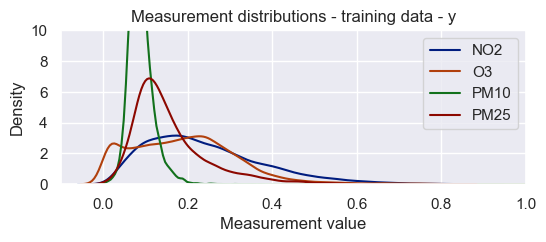

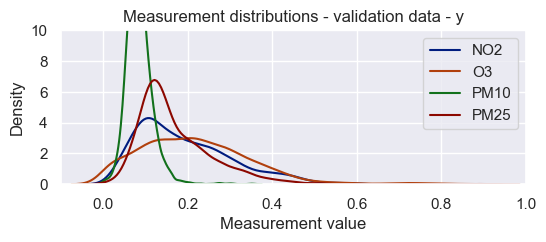

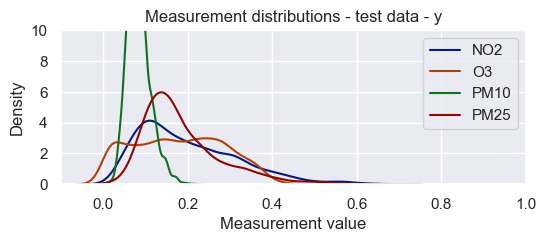

In [65]:
df_training_y_combined = pd.concat([
    df_train_2017_horizontal_y,
    df_train_2018_horizontal_y,
    df_train_2020_horizontal_y,
    df_train_2021_horizontal_y,
    df_train_2022_horizontal_y
])
df_val_y_combined = pd.concat([
    df_val_2021_horizontal_y,
    df_val_2022_horizontal_y,
    df_val_2023_horizontal_y
])
df_test_y_combined = pd.concat([
    df_test_2021_horizontal_y,
    df_test_2022_horizontal_y,
    df_test_2023_horizontal_y
])

plot_distributions_KDE(df_training_y_combined, 'training data - y')
plot_distributions_KDE(df_val_y_combined, 'validation data - y')
plot_distributions_KDE(df_test_y_combined, 'test data - y')